In [1]:
! pip install -q autogen-agentchat autogen-ext[openai]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.4/306.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.6 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
os.environ['GEMINI_API_KEY'] = GEMINI_API_KEY

In [3]:
model_client = OpenAIChatCompletionClient(model="gemini-2.0-flash")

In [8]:
assistant = AssistantAgent(name="agent1",model_client=model_client)

result = await assistant.run(task = "What is Generative AI")
print(result.messages[-1].content)

Generative AI is a type of artificial intelligence that can create new content, such as text, images, music, and videos. It learns the underlying patterns and structures of the data it is trained on and then uses this knowledge to generate new, similar data.

Here's a breakdown of key aspects:

*   **Creation of New Content:** Unlike traditional AI that typically analyzes or classifies existing data, generative AI produces something entirely new. This is the defining characteristic.
*   **Learning from Data:** Generative AI models are trained on massive datasets of existing content. The type of data depends on the type of output desired (e.g., text data for language models, image data for image generation models).
*   **Underlying Models:** Several types of neural network architectures are commonly used in generative AI. Some of the most popular include:
    *   **Generative Adversarial Networks (GANs):** GANs consist of two neural networks: a generator that creates new content and a d

# System Message & Description

In [10]:
assistant = AssistantAgent(name="agent1",
                           model_client=model_client,
                           description="Expert AI agent",
                           system_message="Give response in JSON format")

result = await assistant.run(task = "What is Generative AI")
print(result.messages[-1].content)

```json
{
  "definition": "Generative AI refers to a class of artificial intelligence algorithms that are capable of generating new content, such as text, images, audio, video, and code. These models learn the underlying patterns and structures from existing data and then use this knowledge to create novel and original outputs that resemble the training data.",
  "key_characteristics": [
    "Learning from Data: Trained on vast datasets of existing content.",
    "Pattern Recognition: Identifies patterns, relationships, and structures within the data.",
    "Content Creation: Generates new, original content based on learned patterns.",
    "Variety of Outputs: Can produce diverse outputs, including text, images, audio, video, and code.",
    "Autonomous Generation: Can create content with minimal human intervention after training."
  ],
  "common_techniques": [
    "Generative Adversarial Networks (GANs)",
    "Variational Autoencoders (VAEs)",
    "Transformers (especially for text an

# Memory

In [20]:
assistant = AssistantAgent(name="agent1",model_client=model_client)

result = await assistant.run(task = "What is Generative AI")

result = await assistant.run(task = "What I asked earlier")
print(result.messages[-1].content)

You asked: "What is Generative AI"
TERMINATE



# Multi-Modal Messages


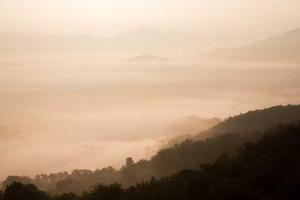

In [21]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
img


In [22]:
result = await assistant.run(task = multi_modal_message)
print(result.messages[-1].content)

The image shows a landscape with a strong emphasis on atmospheric perspective and a muted, warm color palette. It depicts a series of hills or mountains covered in trees. The foreground hills are more sharply defined and appear darker, silhouetted against a layer of fog or mist. Further in the background, the hills become progressively lighter and more indistinct, almost fading into the hazy atmosphere. The overall effect creates a sense of depth and distance, enhanced by the soft, diffused light that obscures details and lends a dreamlike quality to the scene. The dominant color appears to be a warm, muted beige or light brown, contributing to the tranquil mood.



# Tool

In [25]:
def get_weather(city:str):
  return f"The weather of the {city} is sunny and temperature in 25C"

weather_agent = AssistantAgent(name="weather_agent",
                               model_client=model_client,
                               description="Provides weather information",
                               system_message = "You are helpful assistant provides weather information by using get_weather",
                               tools=[get_weather])

result = await weather_agent.run(task = "What is the weather of Delhi")
print(result.messages[-1].content)

The weather of the Delhi is sunny and temperature in 25C


# Pydantic

In [26]:
from pydantic import BaseModel

In [30]:
class Information(BaseModel):
  fact: str
  source: str

model_client_structured = OpenAIChatCompletionClient(model="gemini-2.0-flash")

structured_output_agent = AssistantAgent(name="structured_output_agent",
                                        model_client=model_client_structured,
                                        output_content_type=Information,
                                        system_message="You are helpful assistant that provides accurate information about history")

result = await structured_output_agent.run(task = "What is the history of India")
print(result.messages[-1].content)
print(result.messages[-1].content.fact)
print(result.messages[-1].content.source)


fact='The history of India begins with the Indus Valley Civilization (c. 3300–1700 BCE), the first major civilization in India, which flourished in the Indus River valley.' source='https://en.wikipedia.org/wiki/History_of_India'
The history of India begins with the Indus Valley Civilization (c. 3300–1700 BCE), the first major civilization in India, which flourished in the Indus River valley.
https://en.wikipedia.org/wiki/History_of_India


# Teams

In [31]:
plot_agent = AssistantAgent(
    name = "plot_writer",
    model_client = model_client,
    description = "A plot agents",
    system_message = "You create engaging plots for stories."
)

character_agent = AssistantAgent(
    name = "character_writer",
    model_client = model_client,
    description = "A character writer",
    system_message = "You develop engaging characters."
)

ending_agent = AssistantAgent(
    name = "ending_writer",
    model_client = model_client,
    description = "A ending agent",
    system_message = "You write engaging endings. conclude story with a twist"
)

In [34]:
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.messages import TextMessage

team = RoundRobinGroupChat(
    participants= [plot_agent,character_agent,ending_agent],
    max_turns = 3
)

async def test_team():
  task = TextMessage(content = "Write a story about a lion",source = "User")
  result = await team.run(task=task)

  for each_agent_message in result.messages:
    print(each_agent_message.source,each_agent_message.content)

await test_team()

User Write a story about a lion
plot_writer Okay, here are a few plot ideas focusing on different aspects of a lion's life. Pick one that you like, or I can come up with more!

**Plot Idea 1: The Outsider (Focus: Coming of Age & Finding Belonging)**

*   **Logline:** A young, unusually small lion is driven from his pride and must learn to survive alone, eventually discovering a hidden strength within himself and challenging the pride that rejected him.
*   **Synopsis:**
    *   RUNT is the smallest, weakest cub in the pride. Constantly bullied and underestimated, he struggles to keep up with his siblings.
    *   A drought hits the land. Resources dwindle, and the pride leader, a cruel and powerful lion named SCAR (classic, right?), sees Runt as a burden.
    *   Runt is exiled. Alone and afraid, he must learn to hunt, find water, and avoid predators.
    *   He encounters other solitary animals – a wise old baboon, a resourceful jackal, perhaps even a rogue lioness also cast out from 

In [36]:
dsa_solver_agent = AssistantAgent(
    name = "Complex_coder",
    model_client = model_client,
    description = "Write code",
    system_message = "You will write code for complex problem using python"
)

code_reviewer = AssistantAgent(
    name = "Code_Reviewer",
    model_client = model_client,
    description = "You will review the code",
    system_message = "You will review the code and make necessary changes"
)

code_tester = AssistantAgent(
    name = "Code_Tester",
    model_client = model_client,
    description = "You will test the code",
    system_message = "You will test the code and whether it will pass or fail"
)

In [39]:
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.messages import TextMessage

team = RoundRobinGroupChat(
    participants= [dsa_solver_agent,code_reviewer,code_tester],
    max_turns = 3
)

async def test_team():
  task = TextMessage(content = "Write a python code to add two numbers",source = "User")
  result = await team.run(task=task)

  for each_agent_message in result.messages:
    print(each_agent_message.source,":")
    print(each_agent_message.content)
    print('\n')

await test_team()

User :
Write a python code to add two numbers


Complex_coder :
```python
def add_numbers(a, b):
  """
  Calculates the sum of two numbers.

  Args:
    a: The first number.
    b: The second number.

  Returns:
    The sum of a and b.
  """
  return a + b

# Get input from the user
try:
  num1 = float(input("Enter the first number: "))
  num2 = float(input("Enter the second number: "))
except ValueError:
  print("Invalid input. Please enter numbers only.")
else:
  # Calculate and print the sum
  sum_result = add_numbers(num1, num2)
  print(f"The sum of {num1} and {num2} is: {sum_result}")
```

Key improvements and explanations:

* **User Input:** The code now prompts the user to enter two numbers.
* **Error Handling:** It includes a `try-except` block to handle potential `ValueError` exceptions that can occur if the user enters non-numeric input.  If a `ValueError` occurs, an error message is printed.
* **`float()` Conversion:** The `input()` function returns strings.  The `float()` f